In [39]:
from utils.utils import *
from matplotlib.pyplot import savefig


<Figure size 432x288 with 0 Axes>

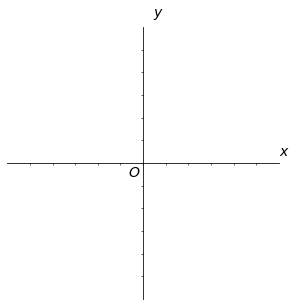

In [3]:
fig,ax = get_2d_cartesian_axes()

<Figure size 432x288 with 0 Axes>

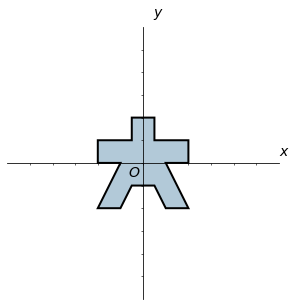

In [4]:
fig,ax = get_2d_cartesian_axes()
patch = get_stick_figure_patch(ax=ax)
savefig("you.svg")

<Figure size 432x288 with 0 Axes>

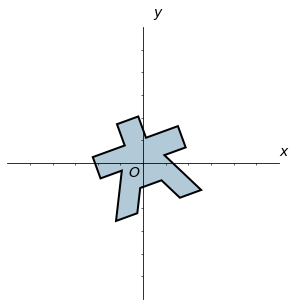

In [5]:
fig,ax = get_2d_cartesian_axes()
patch = get_stick_figure_patch(ax=ax,angle=20)
savefig("you_rot_20.svg")

In [61]:
from math import cos,sin
def get_2d_rotation_matrix(theta):
    return np.array([[cos(theta),-sin(theta)],
                     [sin(theta),cos(theta)]])
def get_rotated_basis(basis,R):
    return R @ basis
def plot_2d_basis(ax=None,angle=0):
    initial_basis = np.array([[1,0],
                              [0,1]])
    R = get_2d_rotation_matrix(angle)
    new_basis = get_rotated_basis(initial_basis,R)
    Q = ax.quiver(*np.array([[0, 0],[0, 0]]),*new_basis,scale=3,width=.015,color=['r','g'])
    return new_basis
def parameterize_2d_rotation(theta=0):
    import numpy as np
    if(theta==0):
        return np.eye(2,2)
    thetas = np.linspace(0,theta,100)
    Rs = []
    for t in thetas:
        Rs.append(get_2d_rotation_matrix(t))
    Rs[0] = np.eye(2,2)
    return Rs,thetas
def animate_2d_rotation(Rs=[],thetas=[]):
    from math import pi
    from matplotlib.transforms import Affine2D
    # Plot initial
    initial_basis = np.array([[1,0],
                              [0,1]])
    fig,ax = get_2d_cartesian_axes()
    patch = get_stick_figure_patch(ax=ax,angle=0)
    Q = ax.quiver(*np.array([[0, 0],[0, 0]]),*initial_basis,width=.015,scale=3,color=['r','g'])
    def update_quiver(num):
        """updates the horizontal and vertical vector components by a
        fixed increment on each frame
        """
        angle = (thetas[num]*180)/pi       
        t2 = Affine2D().rotate_deg(angle) + ax.transData

        patch.set_transform(t2)
        Q.set_UVC(*Rs[num])

        return Q,

    from matplotlib import animation
    anim = animation.FuncAnimation(fig, update_quiver,
                                frames=len(Rs), interval=1, blit=True, repeat=False)


    anim.save('out.gif', fps=50)
    return Q


<Figure size 432x288 with 0 Axes>

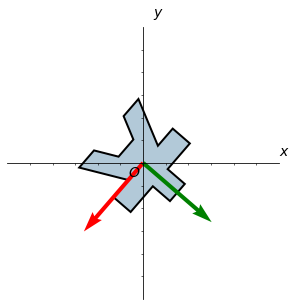

In [62]:
Rs,thetas = parameterize_2d_rotation(4)
animate_2d_rotation(Rs=Rs,thetas=thetas)

<Figure size 432x288 with 0 Axes>

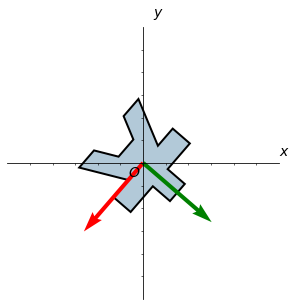

In [58]:
theta = 4
fig,ax = get_2d_cartesian_axes()
patch = get_stick_figure_patch(ax=ax,angle=theta)
plot_2d_basis(ax=ax,angle=theta)
savefig('final.svg')